In [1]:
import pandas as pd
import numpy as np

In [2]:
all_ids_v1 = pd.read_csv('../source/billionaires list - eo_final.csv')
all_ids = pd.read_csv('../source/GM-Billionaires_list-v2 - eo_final.csv')

In [3]:
all_ids_v1[all_ids_v1['Unique Gapminder ID'].duplicated(keep=False)]

,Unique Gapminder ID,Forbes_id,Hurun_id
704,gurbachan_singh_dhingra,gurbachan_singh_dhingra,gurbachan_singh_dhingra
731,hari_bhartia,hari_bhartia,hari_bhartia
1114,kuldip_singh_dhingra,kuldip_singh_dhingra,kuldip_singh_dhingra
1115,kuldip_singh_dhingra,kuldip_singh_gurbachan_singh_dhingra,kuldip_singh_dhingra
1892,shyam_bhartia,shyam_bhartia,shyam_bhartia
1893,hari_bhartia,shyam_hari_bhartia,hari_bhartia
2780,gurbachan_singh_dhingra,kunio_busujima,gurbachan_singh_dhingra
2873,shyam_bhartia,siegfried_meister,shyam_bhartia
3916,udo_tschira,NaN,udo_tschira
3917,udo_tschira,udo_harald_tschira,urmish_hasmukh_chudgar


In [4]:
all_ids_v1[all_ids_v1['Hurun_id'] == "joseph_safra"]

,Unique Gapminder ID,Forbes_id,Hurun_id
1024,joseph_safra,joseph_safra,joseph_safra


In [5]:
all_ids_v1.shape

(5370, 3)

In [6]:
all_ids

,Unique Gapminder ID,Forbes_id,Hurun_id,Unnamed: 3,Unnamed: 4
0,abdulla_al_futtaim,abdulla_al_futtaim,abdulla_al_futtaim,NaN,1
1,abdullah_al_rajhi,abdullah_al_rajhi,abdullah_al_rajhi,NaN,1
2,abdulsamad_rabiu,abdulsamad_rabiu,abdulsamad_rabiu,NaN,1
3,abhay_soi,abhay_soi,abhay_soi,NaN,1
4,abhay_vakil,abhay_vakil,abhay_vakil,NaN,1
...,...,...,...,...,...
6048,zhu_chongyun,zhu_chongyun,NaN,NaN,NaN
6049,zhu_qingyi,zhu_qingyi,NaN,NaN,NaN
6050,zhu_yan,zhu_yan,NaN,NaN,NaN
6051,ziyad_manasir,ziyad_manasir,NaN,NaN,NaN


In [7]:
all_ids.drop_duplicates()

,Unique Gapminder ID,Forbes_id,Hurun_id,Unnamed: 3,Unnamed: 4
0,abdulla_al_futtaim,abdulla_al_futtaim,abdulla_al_futtaim,NaN,1
1,abdullah_al_rajhi,abdullah_al_rajhi,abdullah_al_rajhi,NaN,1
2,abdulsamad_rabiu,abdulsamad_rabiu,abdulsamad_rabiu,NaN,1
3,abhay_soi,abhay_soi,abhay_soi,NaN,1
4,abhay_vakil,abhay_vakil,abhay_vakil,NaN,1
...,...,...,...,...,...
6048,zhu_chongyun,zhu_chongyun,NaN,NaN,NaN
6049,zhu_qingyi,zhu_qingyi,NaN,NaN,NaN
6050,zhu_yan,zhu_yan,NaN,NaN,NaN
6051,ziyad_manasir,ziyad_manasir,NaN,NaN,NaN


In [8]:
all_ids = all_ids.iloc[:, :3].dropna(axis=0, how='all').drop_duplicates()

In [9]:
all_ids.columns = ['gm_id', 'forbes_id', 'hurun_id']

In [10]:
all_ids

,gm_id,forbes_id,hurun_id
0,abdulla_al_futtaim,abdulla_al_futtaim,abdulla_al_futtaim
1,abdullah_al_rajhi,abdullah_al_rajhi,abdullah_al_rajhi
2,abdulsamad_rabiu,abdulsamad_rabiu,abdulsamad_rabiu
3,abhay_soi,abhay_soi,abhay_soi
4,abhay_vakil,abhay_vakil,abhay_vakil
...,...,...,...
6048,zhu_chongyun,zhu_chongyun,NaN
6049,zhu_qingyi,zhu_qingyi,NaN
6050,zhu_yan,zhu_yan,NaN
6051,ziyad_manasir,ziyad_manasir,NaN


In [11]:
# steps:
# 1. get the dict for forbes id -> gm id and hurun id -> gm id
# 2. convert indicators to use gm id
# 3. merge indicators. (ask Ola what to do for duplicated people, what indicators we need to add)
# 4. maybe add portrait to entities
# 5. calculate the income mountain again.
# 6. make documents

# added step:
# for some of forbes records, we need to separate them into multiple results.
# so we should first divide forbes mapping into 2 parts.


In [12]:
# how to calculate the indicator required by income mountain:
# income by person, year -> income by person, geo, year -> income_level by person, geo, year
# -> population by income_level, geo, year

In [13]:
fm = all_ids[['forbes_id', 'gm_id']].dropna(how='any')

fm1 = fm[fm['forbes_id'].duplicated(keep=False)]  # these ones need to be split to mulitple people.
fm2 = fm[~fm['forbes_id'].duplicated(keep=False)]

In [14]:
fm1

,forbes_id,gm_id
2950,chuchat_petaumpai_daonapa_petampai,daonapa_petampai
3112,lee_yeow_chor_yeow_seng,lee_yeow_chor
3230,safra,joseph_safra
3277,udo_harald_tschira,udo_tschira
3278,vinod_anil_rai_gupta,vinod_gupta
3301,willi_isolde_liebherr,willi_liebherr
3424,vinod_anil_rai_gupta,anil_rai_gupta
3532,safra,chelia_cohen_safra
3602,chuchat_petaumpai_daonapa_petampai,chuchat_petaumpai
3625,safra,david_j_safra


In [15]:
fm1.sort_values(by='gm_id')

,forbes_id,gm_id
3424,vinod_anil_rai_gupta,anil_rai_gupta
3532,safra,chelia_cohen_safra
3602,chuchat_petaumpai_daonapa_petampai,chuchat_petaumpai
2950,chuchat_petaumpai_daonapa_petampai,daonapa_petampai
3625,safra,david_j_safra
3698,safra,esther_safra
3816,udo_harald_tschira,harald_tschira
3917,willi_isolde_liebherr,isolde_liebherr
3924,safra,jacob_j_safra
3230,safra,joseph_safra


In [16]:
# 1. convert forbes datapoints to use gm_id
# 1.1 split groups

In [17]:
forbes_dps = pd.read_csv('../intermediate/forbes/ddf--datapoints--annual_income--by--person--year.csv')

In [18]:
forbes_dps

,person,year,annual_income
0,a_jayson_adair,2021,30000000.0
1,a_jayson_adair,2022,33000000.0
2,a_jerrold_perenchio,2002,78000000.0
3,a_jerrold_perenchio,2003,69000000.0
4,a_jerrold_perenchio,2004,81000000.0
...,...,...,...
28720,zygmunt_solorz_zak,2018,84000000.0
28721,zygmunt_solorz_zak,2019,81000000.0
28722,zygmunt_solorz_zak,2020,72000000.0
28723,zygmunt_solorz_zak,2021,96000000.0


In [19]:
fb1 = forbes_dps[forbes_dps.person.isin(fm1.forbes_id.unique())].copy()
fb2 = forbes_dps[~forbes_dps.person.isin(fm1.forbes_id.unique())].copy()

In [20]:
forbes_dps.shape

(28725, 3)

In [21]:
fb1.shape[0] + fb2.shape[0]

28725

In [22]:
fm1g = fm1.groupby('forbes_id')['gm_id']

In [23]:
fb1g = fb1.groupby('person')

In [24]:
fb1g.get_group('lee_yeow_chor_yeow_seng')

,person,year,annual_income
14795,lee_yeow_chor_yeow_seng,2020,108000000.0
14796,lee_yeow_chor_yeow_seng,2021,153000000.0


In [25]:
def create_rec(df, names):
    recs = list()
    ser = df.set_index('year')['annual_income']
    num = len(names)
    
    for y in ser.index:
        income = int(ser.loc[y] / num)
        for n in names:
            rec = dict(person=n, year=y, annual_income=income)
            recs.append(rec)
    return pd.DataFrame.from_records(recs)

In [26]:
fm1g.get_group('lee_yeow_chor_yeow_seng').values

array(['lee_yeow_chor', 'lee_yeow_seng'], dtype=object)

In [27]:
fb3dfs = list()

for g, df in fb1g:
    new_df = create_rec(df, fm1g.get_group(g).values)
    fb3dfs.append(new_df)

In [28]:
fb3 = pd.concat(fb3dfs, ignore_index=True)

In [29]:
fb3

,person,year,annual_income
0,daonapa_petampai,2018,30000000
1,chuchat_petaumpai,2018,30000000
2,daonapa_petampai,2019,36000000
3,chuchat_petaumpai,2019,36000000
4,daonapa_petampai,2021,52500000
...,...,...,...
109,isolde_liebherr,2016,75000000
110,willi_liebherr,2017,72000000
111,isolde_liebherr,2017,72000000
112,willi_liebherr,2018,106500000


In [30]:
# 1.2 convert others

In [31]:
np.any(fm2.set_index('forbes_id')['gm_id'].index.duplicated())

False

In [32]:
fb2_map = fm2.set_index('forbes_id')['gm_id'].to_dict()

In [33]:
fb2['person'] = fb2['person'].map(lambda x: fb2_map[x])

In [34]:
# why there are not existing entries? 
# because data is usnig forbes 2022. Mapping still using forbes 2021

In [35]:
def _f(x):
    if x not in fb2_map:
        # print(x)
        return None
    return fb2_map[x]
fb2['gm_id'] = fb2['person'].map(_f)

In [36]:
fb2

,person,year,annual_income,gm_id
0,a_jayson_adair,2021,30000000.0,a_jayson_adair
1,a_jayson_adair,2022,33000000.0,a_jayson_adair
2,a_jerrold_perenchio,2002,78000000.0,a_jerrold_perenchio
3,a_jerrold_perenchio,2003,69000000.0,a_jerrold_perenchio
4,a_jerrold_perenchio,2004,81000000.0,a_jerrold_perenchio
...,...,...,...,...
28720,zygmunt_solorz_zak,2018,84000000.0,zygmunt_solorz_zak
28721,zygmunt_solorz_zak,2019,81000000.0,zygmunt_solorz_zak
28722,zygmunt_solorz_zak,2020,72000000.0,zygmunt_solorz_zak
28723,zygmunt_solorz_zak,2021,96000000.0,zygmunt_solorz_zak


In [37]:
fb2[pd.isnull(fb2.gm_id)]

,person,year,annual_income,gm_id
4321,cher_wang,2006,6.300000e+07,None
4322,cher_wang,2010,6.000000e+07,None
4323,cher_wang,2011,2.040000e+08,None
4324,cher_wang,2012,1.200000e+08,None
4325,cher_wang,2013,7.200000e+07,None
14406,lakshmi_n_mittal,2002,4.200000e+07,None
14407,lakshmi_n_mittal,2003,6.600000e+07,None
14408,lakshmi_n_mittal,2004,1.860000e+08,None
14409,lakshmi_n_mittal,2005,7.500000e+08,None
14410,lakshmi_n_mittal,2006,7.050000e+08,None


In [38]:
# drop them for now

In [39]:
fb4 = fb2[['gm_id', 'year', 'annual_income']].copy()
fb4 = fb4.dropna(how='any')
fb4.columns = ['person', 'year', 'annual_income']

In [40]:
fb_final = pd.concat([fb4, fb3], ignore_index=True).sort_values(by=['person', 'year'])

In [42]:
fb_final

,person,year,annual_income
0,a_jayson_adair,2021,30000000.0
1,a_jayson_adair,2022,33000000.0
2,a_jerrold_perenchio,2002,78000000.0
3,a_jerrold_perenchio,2003,69000000.0
4,a_jerrold_perenchio,2004,81000000.0
...,...,...,...
28655,zygmunt_solorz_zak,2018,84000000.0
28656,zygmunt_solorz_zak,2019,81000000.0
28657,zygmunt_solorz_zak,2020,72000000.0
28658,zygmunt_solorz_zak,2021,96000000.0


In [43]:
# done for forbes datapoints

In [44]:
# now convert hurun data to use gm_id

In [45]:
hurun_dps = pd.read_csv('../intermediate/hurun/ddf--datapoints--annual_income--by--person--year.csv')

In [46]:
hurun_dps

,person,year,annual_income
0,abdulla_ahmed_al_ghurair,2017,39000000.0
1,abdulla_ahmed_al_ghurair,2018,39000000.0
2,abdulla_ahmed_al_ghurair,2019,36000000.0
3,abdulla_ahmed_al_ghurair,2020,36000000.0
4,abdulla_ahmed_al_ghurair,2021,36000000.0
...,...,...,...
17977,zygmunt_solorz_zak,2018,90000000.0
17978,zygmunt_solorz_zak,2019,78000000.0
17979,zygmunt_solorz_zak,2020,84000000.0
17980,zygmunt_solorz_zak,2021,96000000.0


In [47]:
hr = hurun_dps.copy()

In [48]:
hr_map = all_ids[['hurun_id', 'gm_id']].dropna(how='any').set_index('hurun_id')['gm_id'].to_dict()

In [49]:
hr['gm_id'] = hr['person'].map(lambda x: hr_map[x])

In [50]:
# why again there are missing entries?
# because the this version of mapping doesn't include names in hurun that doesn't have `country` property.

In [51]:
def _f(x):
    if x not in hr_map:
        return None
    return hr_map[x]
hr['gm_id'] = hr['person'].map(_f)

In [52]:
len(hr[pd.isnull(hr.gm_id)]['person'].unique())  # dropped records.

0

In [53]:
len(hr.person.unique())  # total records

5028

In [54]:
hr2 = hr[['gm_id', 'year', 'annual_income']].dropna()

In [55]:
hr2

,gm_id,year,annual_income
0,abdulla_bin_ahmad_al_ghurair,2017,39000000.0
1,abdulla_bin_ahmad_al_ghurair,2018,39000000.0
2,abdulla_bin_ahmad_al_ghurair,2019,36000000.0
3,abdulla_bin_ahmad_al_ghurair,2020,36000000.0
4,abdulla_bin_ahmad_al_ghurair,2021,36000000.0
...,...,...,...
17977,zygmunt_solorz_zak,2018,90000000.0
17978,zygmunt_solorz_zak,2019,78000000.0
17979,zygmunt_solorz_zak,2020,84000000.0
17980,zygmunt_solorz_zak,2021,96000000.0


In [56]:
hr2.columns = ['person', 'year', 'annual_income']

In [57]:
# now, concat all values, drop duplicated

In [58]:
d1 = fb_final.copy()
d1['source'] = 'forbes'

d2 = hr2.copy()
d2['source'] = 'hurun'

dps = pd.concat([d1, d2], ignore_index=True)

In [59]:
dps[dps.duplicated(subset=['person', 'year'], keep=False)]

,person,year,annual_income,source
17,a_jerrold_perenchio,2017,84000000.0,forbes
43,abdulla_al_futtaim,2017,123000000.0,forbes
44,abdulla_al_futtaim,2018,99000000.0,forbes
45,abdulla_al_futtaim,2019,75000000.0,forbes
46,abdulla_al_futtaim,2020,63000000.0,forbes
...,...,...,...,...
46751,zygmunt_solorz_zak,2018,90000000.0,hurun
46752,zygmunt_solorz_zak,2019,78000000.0,hurun
46753,zygmunt_solorz_zak,2020,84000000.0,hurun
46754,zygmunt_solorz_zak,2021,96000000.0,hurun


In [60]:
# let's see how different are they
dpsg = dps.groupby(['person'])

In [61]:
dpsg.get_group('mark_zuckerberg')   ## TODO: seems quite different. maybe check more people

,person,year,annual_income,source
16969,mark_zuckerberg,2008,4.500000e+07,forbes
16970,mark_zuckerberg,2010,1.200000e+08,forbes
16971,mark_zuckerberg,2011,4.050000e+08,forbes
16972,mark_zuckerberg,2012,5.250000e+08,forbes
16973,mark_zuckerberg,2013,3.990000e+08,forbes
16974,mark_zuckerberg,2014,8.550000e+08,forbes
16975,mark_zuckerberg,2015,1.002000e+09,forbes
16976,mark_zuckerberg,2016,1.338000e+09,forbes
16977,mark_zuckerberg,2017,1.680000e+09,forbes
16978,mark_zuckerberg,2018,2.130000e+09,forbes


In [62]:
# But I am going to use Forbes data for these duplicated people for now.

In [63]:
def keep_one_source(df):
    if len(df['source'].unique()) == 2:
        df_new = df[df['source'] == 'forbes'][['person', 'year', 'annual_income']].set_index(['person', 'year'])
    else:
        df_new = df[['person', 'year', 'annual_income']].set_index(['person', 'year'])
    return df_new

In [64]:
keep_one_source(dpsg.get_group('mark_zuckerberg'))

annual_income
person          year               
mark_zuckerberg 2008   4.500000e+07
                2010   1.200000e+08
                2011   4.050000e+08
                2012   5.250000e+08
                2013   3.990000e+08
                2014   8.550000e+08
                2015   1.002000e+09
                2016   1.338000e+09
                2017   1.680000e+09
                2018   2.130000e+09
                2019   1.869000e+09
                2020   1.641000e+09
                2021   2.910000e+09
                2022   2.019000e+09

In [65]:
dps2 = dpsg.apply(keep_one_source)

In [66]:
dps2

annual_income
person              person              year               
a_jayson_adair      a_jayson_adair      2021     30000000.0
                                        2022     33000000.0
a_jerrold_perenchio a_jerrold_perenchio 2002     78000000.0
                                        2003     69000000.0
                                        2004     81000000.0
...                                                     ...
zygmunt_solorz_zak  zygmunt_solorz_zak  2018     84000000.0
                                        2019     81000000.0
                                        2020     72000000.0
                                        2021     96000000.0
                                        2022     87000000.0

[33342 rows x 1 columns]

In [67]:
dps2 = dps2.reset_index(0, drop=True)

In [68]:
dps2

annual_income
person              year               
a_jayson_adair      2021     30000000.0
                    2022     33000000.0
a_jerrold_perenchio 2002     78000000.0
                    2003     69000000.0
                    2004     81000000.0
...                                 ...
zygmunt_solorz_zak  2018     84000000.0
                    2019     81000000.0
                    2020     72000000.0
                    2021     96000000.0
                    2022     87000000.0

[33342 rows x 1 columns]

In [69]:
dps2['annual_income'] = dps2['annual_income'].astype(int)

In [70]:
dps2 = dps2.reset_index()

In [71]:
dps2.columns = ['person', 'time', 'annual_income']

In [72]:
# now we should convert them to 2017 PPP dollars.

<AxesSubplot:>

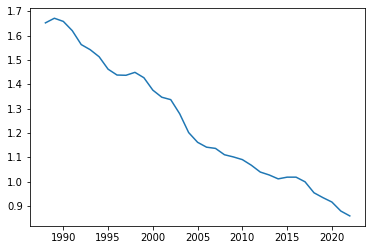

In [73]:
rates = [1.652, 1.671, 1.658, 1.620, 1.563, 1.542, 1.513, 1.462, 1.438, 1.437, 1.449, 1.427, 1.376, 1.347, 1.337, 1.279, 1.202, 1.162, 1.142, 1.137, 1.111, 1.102, 1.091, 1.068, 1.040, 1.028, 1.012, 1.019, 1.019, 1.000, 0.955, 0.935, 0.917, 0.88, 0.86]
years = list(range(1988, 2023))
rs = pd.Series(rates, index=years)
rs.plot()

In [74]:
rs.index.name = 'time'
rs.name = 'rate'
dfrs = rs.reset_index()

In [75]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

plt.rcParams['figure.dpi'] = 192

In [77]:
X = rs.index.values
Y = rs.values
X = sm.add_constant(X)

model = sm.OLS(Y, X)
modelres = model.fit()

In [78]:
modelres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1433.
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           9.12e-29
Time:                        15:17:04   Log-Likelihood:                 65.535
No. Observations:                  35   AIC:                            -127.1
Df Residuals:                      33   BIC:                            -124.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.9045      1.286     38.816      0.000      47.289      52.520
x1            -0.0243      0.001    -37.850      0.000      -0.026      -0.023
==============================================================================
Omnibus:                        3.072   Durbin-Watson:                   0.295
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                2.462
Skew:                          -0.521   Prob(JB):                        0.292
Kurtosis:                       2.222   Cond. No.                     3.98e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

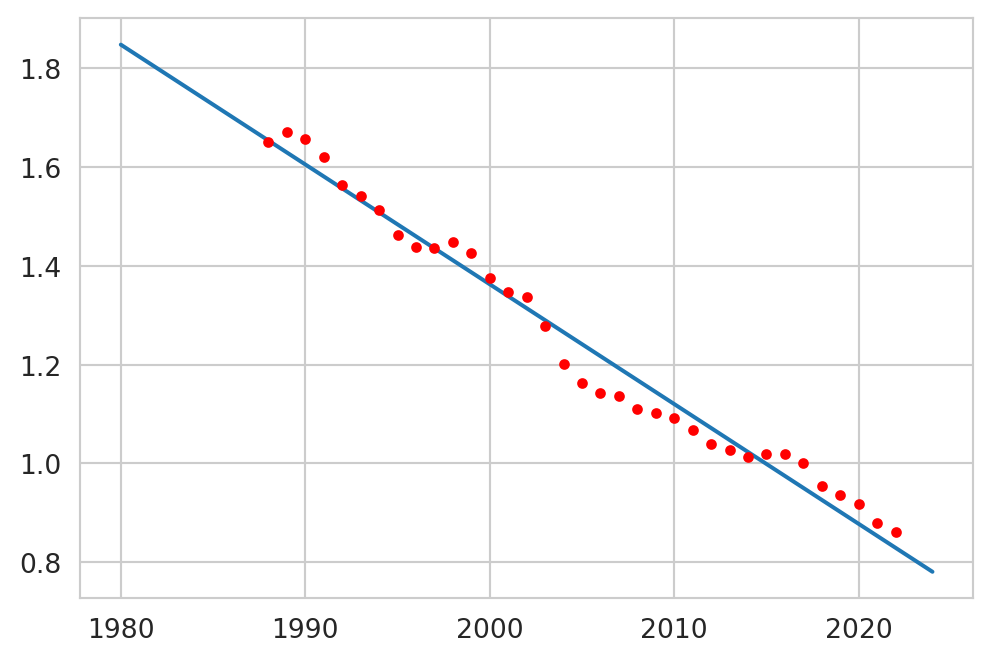

In [79]:
b, a = modelres.params
x = list(range(1980, 2025))

yp = [a * x_ + b for x_ in x]

plt.plot(x, yp)
plt.plot(dfrs.time, dfrs.rate, 'r.')

In [81]:
def get_inflation_rate(y):
    if y in rs.index:
        return rs.loc[y]
    else:
        return a * y + b

In [82]:
get_inflation_rate(2017), get_inflation_rate(2011)

(1.0, 1.068)

In [83]:
dps2['rates'] = dps2['time'].map(get_inflation_rate)

In [84]:
dps2['annual_income_2017'] = dps2['annual_income'] * dps2['rates']

In [85]:
dps2

,person,time,annual_income,rates,annual_income_2017
0,a_jayson_adair,2021,30000000,0.880,26400000.0
1,a_jayson_adair,2022,33000000,0.860,28380000.0
2,a_jerrold_perenchio,2002,78000000,1.337,104286000.0
3,a_jerrold_perenchio,2003,69000000,1.279,88251000.0
4,a_jerrold_perenchio,2004,81000000,1.202,97362000.0
...,...,...,...,...,...
33337,zygmunt_solorz_zak,2018,84000000,0.955,80220000.0
33338,zygmunt_solorz_zak,2019,81000000,0.935,75735000.0
33339,zygmunt_solorz_zak,2020,72000000,0.917,66024000.0
33340,zygmunt_solorz_zak,2021,96000000,0.880,84480000.0


In [86]:
dps3 = dps2.set_index(['person', 'time'])['annual_income_2017']

In [87]:
dps3.name = 'annual_income'

In [88]:
dps3

person               time
a_jayson_adair       2021     26400000.0
                     2022     28380000.0
a_jerrold_perenchio  2002    104286000.0
                     2003     88251000.0
                     2004     97362000.0
                                ...     
zygmunt_solorz_zak   2018     80220000.0
                     2019     75735000.0
                     2020     66024000.0
                     2021     84480000.0
                     2022     74820000.0
Name: annual_income, Length: 33342, dtype: float64

In [89]:
dps3.astype(int).to_csv('../../ddf--datapoints--annual_income--by--person--time.csv')

In [90]:
# now get the daily income 
# FIXME: should start from worth, then annual_income/daily_income

In [91]:
dps4 = dps3.copy()

In [92]:
dps4 = dps4 / 365.
dps4 = dps4.astype(int)

dps4.name = 'daily_income'

In [93]:
dps4.to_csv('../../ddf--datapoints--daily_income--by--person--time.csv')

In [71]:
# 2. combine the entities

In [72]:
forbes_ent = pd.read_csv('../intermediate/forbes/ddf--entities--person.csv')

In [73]:
hurun_ent = pd.read_csv('../intermediate/hurun/ddf--entities--person.csv')

In [74]:
forbes_ent 

,person,name,country,state,headquarters,source,industry,image_uri,age,gender,last_name
0,a_jayson_adair,A. Jayson Adair,United States,Texas,TX,damaged cars,Automotive,no-pic,52.0,M,Adair
1,a_jerrold_perenchio,A. Jerrold Perenchio,United States,California,CA,"Univision; television; television, Univision",Media; Media & Entertainment,no-pic; a-jerrold-perenchio,91.0,M,Perenchio
2,abdul_aziz_al_ghurair,Abdul Aziz Al Ghurair,United Arab Emirates,NaN,NaN,banking,Finance,no-pic; abdul-aziz-al-ghurair,67.0,M,Al Ghurair
3,abdul_majeed_alhokair,Abdul Majeed Alhokair,Saudi Arabia,NaN,NaN,"retail, real estate",Fashion & Retail,no-pic,52.0,M,Alhokair
4,abdul_rasyid,Abdul Rasyid,Indonesia,NaN,NaN,"timber, palm oil",Manufacturing,abdul-rasyid,64.0,M,Abdul
...,...,...,...,...,...,...,...,...,...,...,...
4219,zong_yanmin,Zong Yanmin,China,NaN,NaN,Semiconductor materials,Manufacturing,no-pic,NaN,M,Zong
4220,zugen_ni,Zugen Ni,China,Jiangsu,NaN,appliances,Manufacturing,no-pic,65.0,M,Ni
4221,zuo_hui,Zuo Hui,China,NaN,NaN,real estate services,Real Estate,no-pic,51.0,M,Zuo
4222,zuowen_song,Zuowen Song,China,NaN,NaN,"aluminum, diversified",Diversified,zuowen-song,75.0,M,Song


In [75]:
fbent1 = forbes_ent[forbes_ent.person.isin(fm1.forbes_id.unique())].copy()
fbent2 = forbes_ent[~forbes_ent.person.isin(fm1.forbes_id.unique())].copy()

In [76]:
fbent2

,person,name,country,state,headquarters,source,industry,image_uri,age,gender,last_name
0,a_jayson_adair,A. Jayson Adair,United States,Texas,TX,damaged cars,Automotive,no-pic,52.0,M,Adair
1,a_jerrold_perenchio,A. Jerrold Perenchio,United States,California,CA,"Univision; television; television, Univision",Media; Media & Entertainment,no-pic; a-jerrold-perenchio,91.0,M,Perenchio
2,abdul_aziz_al_ghurair,Abdul Aziz Al Ghurair,United Arab Emirates,NaN,NaN,banking,Finance,no-pic; abdul-aziz-al-ghurair,67.0,M,Al Ghurair
3,abdul_majeed_alhokair,Abdul Majeed Alhokair,Saudi Arabia,NaN,NaN,"retail, real estate",Fashion & Retail,no-pic,52.0,M,Alhokair
4,abdul_rasyid,Abdul Rasyid,Indonesia,NaN,NaN,"timber, palm oil",Manufacturing,abdul-rasyid,64.0,M,Abdul
...,...,...,...,...,...,...,...,...,...,...,...
4219,zong_yanmin,Zong Yanmin,China,NaN,NaN,Semiconductor materials,Manufacturing,no-pic,NaN,M,Zong
4220,zugen_ni,Zugen Ni,China,Jiangsu,NaN,appliances,Manufacturing,no-pic,65.0,M,Ni
4221,zuo_hui,Zuo Hui,China,NaN,NaN,real estate services,Real Estate,no-pic,51.0,M,Zuo
4222,zuowen_song,Zuowen Song,China,NaN,NaN,"aluminum, diversified",Diversified,zuowen-song,75.0,M,Song


In [77]:
fbent2.columns

Index(['person', 'name', 'country', 'state', 'headquarters', 'source',
       'industry', 'image_uri', 'age', 'gender', 'last_name'],
      dtype='object')

In [78]:
cols_rec = ['country', 'state', 'headquarters', 'source', 'industry', 'last_name']

In [79]:
def create_entrec():
    res = []
    
    for _, row in fbent1.iterrows():
        name = row['person']
        newnames = fm1g.get_group(name)
        rec = dict([(c, row[c]) for c in cols_rec])
        for n in newnames:
            rec_ = rec.copy()
            rec_['person'] = n
            res.append(rec_)
            
    return pd.DataFrame.from_records(res)

In [80]:
create_entrec()

,country,state,headquarters,source,industry,last_name,person
0,Taiwan,NaN,NaN,technology; electronics; HTC,Technology,Wenchi Chen,chen_wen_chi
1,Taiwan,NaN,NaN,technology; electronics; HTC,Technology,Wenchi Chen,cher_wang
2,Thailand,NaN,NaN,motorcycle loans,Finance & Investments; Finance and Investments,Chuchat Petaumpai &,daonapa_petampai
3,Thailand,NaN,NaN,motorcycle loans,Finance & Investments; Finance and Investments,Chuchat Petaumpai &,chuchat_petaumpai
4,Singapore,NaN,NaN,Real Estate; real estate; Pontiac Land Group,Real Estate,Kwee,kwee_liong_keng
5,Singapore,NaN,NaN,Real Estate; real estate; Pontiac Land Group,Real Estate,Kwee,kwee_liong_seen
6,Singapore,NaN,NaN,Real Estate; real estate; Pontiac Land Group,Real Estate,Kwee,kwee_liong_tek
7,Singapore,NaN,NaN,Real Estate; real estate; Pontiac Land Group,Real Estate,Kwee,kwee
8,Malaysia,NaN,NaN,"palm oil, property",Food & Beverage,Lee,lee_yeow_seng
9,Malaysia,NaN,NaN,"palm oil, property",Food & Beverage,Lee,lee_yeow_chor_yeow_seng


In [81]:
fbent3 = create_entrec()

In [82]:
fbent4 = fbent2.copy()

In [83]:
len(fm2)

4118

In [84]:
fm2_mapping = fm2.set_index('forbes_id')['gm_id'].to_dict()

In [85]:
def _f(x):
    if x in fm2_mapping:
        return fm2_mapping[x]
    # print(x)
    return None

fbent4['gm_id'] = fbent4['person'].map(_f)

In [86]:
fbent4[pd.isnull(fbent4.gm_id)]

,person,name,country,state,headquarters,source,industry,image_uri,age,gender,last_name,gm_id
310,baoguo_zhu_1,Baoguo Zhu & family; Baoguo Zhu,China,Guangdong,NaN,pharmaceuticals,Healthcare,no-pic,59.0,M,Zhu,None
311,baokun_bai,Baokun Bai,China,Guangdong,NaN,hardware,Manufacturing,no-pic,NaN,M,Bai,None
324,beatriz_davila_de_santo_domingo,Beatriz Davila de Santo Domingo,Colombia,NaN,NaN,beer,Food & Beverage,no-pic-female,83.0,F,Davila de Santo Domingo,None
382,bo_wu,Bo Wu,China,Jiangsu,NaN,machinery,Manufacturing,no-pic,67.0,M,Wu,None
506,chaoqun_wu,Chaoqun Wu,China,Sichuan,NaN,chemicals,Manufacturing,no-pic,52.0,M,Wu,None
...,...,...,...,...,...,...,...,...,...,...,...,...
4167,zhong_ruonong,Zhong Ruonong & family; Zhong Ruonong,China,Hunan,NaN,electronics,Manufacturing,no-pic-female,59.0,F,Zhong,None
4173,zhou_bajin,Zhou Bajin,China,Jiangsu,NaN,auto parts,Manufacturing,no-pic,86.0,M,Zhou,None
4178,zhou_jian_3,Zhou Jian,China,NaN,NaN,solar energy equipment,Energy,no-pic,45.0,M,Zhou,None
4183,zhou_ping,Zhou Ping,China,NaN,NaN,utilities,Service,no-pic,59.0,M,Zhou,None


In [87]:
fbent4 = fbent4[~pd.isnull(fbent4.gm_id)]
fbent4 = fbent4.set_index(['gm_id']).drop(columns=['person'])
fbent4.index.name = 'person'
fbent4 = fbent4.reset_index()

In [88]:
fbent4

,person,name,country,state,headquarters,source,industry,image_uri,age,gender,last_name
0,a_jayson_adair,A. Jayson Adair,United States,Texas,TX,damaged cars,Automotive,no-pic,52.0,M,Adair
1,a_jerrold_perenchio,A. Jerrold Perenchio,United States,California,CA,"Univision; television; television, Univision",Media; Media & Entertainment,no-pic; a-jerrold-perenchio,91.0,M,Perenchio
2,abdul_aziz_al_ghurair,Abdul Aziz Al Ghurair,United Arab Emirates,NaN,NaN,banking,Finance,no-pic; abdul-aziz-al-ghurair,67.0,M,Al Ghurair
3,abdul_majeed_alhokair,Abdul Majeed Alhokair,Saudi Arabia,NaN,NaN,"retail, real estate",Fashion & Retail,no-pic,52.0,M,Alhokair
4,abdul_rasyid,Abdul Rasyid,Indonesia,NaN,NaN,"timber, palm oil",Manufacturing,abdul-rasyid,64.0,M,Abdul
...,...,...,...,...,...,...,...,...,...,...,...
4113,zong_yanmin,Zong Yanmin,China,NaN,NaN,Semiconductor materials,Manufacturing,no-pic,NaN,M,Zong
4114,zugen_ni,Zugen Ni,China,Jiangsu,NaN,appliances,Manufacturing,no-pic,65.0,M,Ni
4115,zuo_hui,Zuo Hui,China,NaN,NaN,real estate services,Real Estate,no-pic,51.0,M,Zuo
4116,zuowen_song,Zuowen Song,China,NaN,NaN,"aluminum, diversified",Diversified,zuowen-song,75.0,M,Song


In [123]:
fbent_final = pd.concat([fbent4, fbent3], ignore_index=True)

In [90]:
fbent_final

,person,name,country,state,headquarters,source,industry,image_uri,age,gender,last_name
0,a_jayson_adair,A. Jayson Adair,United States,Texas,TX,damaged cars,Automotive,no-pic,52.0,M,Adair
1,a_jerrold_perenchio,A. Jerrold Perenchio,United States,California,CA,"Univision; television; television, Univision",Media; Media & Entertainment,no-pic; a-jerrold-perenchio,91.0,M,Perenchio
2,abdul_aziz_al_ghurair,Abdul Aziz Al Ghurair,United Arab Emirates,NaN,NaN,banking,Finance,no-pic; abdul-aziz-al-ghurair,67.0,M,Al Ghurair
3,abdul_majeed_alhokair,Abdul Majeed Alhokair,Saudi Arabia,NaN,NaN,"retail, real estate",Fashion & Retail,no-pic,52.0,M,Alhokair
4,abdul_rasyid,Abdul Rasyid,Indonesia,NaN,NaN,"timber, palm oil",Manufacturing,abdul-rasyid,64.0,M,Abdul
...,...,...,...,...,...,...,...,...,...,...,...
4134,udo_harald_tschira,NaN,Germany,NaN,NaN,software; Software,Technology,NaN,NaN,NaN,Tschira
4135,anil_rai_gupta,NaN,India,NaN,NaN,electrical equipment,Manufacturing,NaN,NaN,NaN,Gupta
4136,vinod_anil_rai_gupta,NaN,India,NaN,NaN,electrical equipment,Manufacturing,NaN,NaN,NaN,Gupta
4137,isolde_liebherr,NaN,Switzerland,NaN,NaN,construction; Construction,Construction & Engineering,NaN,NaN,NaN,Liebherr


In [91]:
fbent_final[fbent_final.country.str.contains(';')].shape

(54, 11)

In [92]:
fbent_final[fbent_final.country.str.contains(';')]['country'].values

array(['United States; Colombia', 'Kazakhstan; Israel', 'India; Thailand',
       'Germany; United States', 'Czechia; Czech Republic',
       'Lebanon; Saudi Arabia', 'Lebanon; Switzerland', 'Georgia; Russia',
       'China; Canada', 'Hong Kong; China', 'Hong Kong; China',
       'Czechia; Czech Republic', 'Brazil; United States',
       'United States; Russia', 'Switzerland; Germany',
       'Switzerland; Germany', 'United Kingdom; India', 'Macao; Macau',
       'Hong Kong; China', 'Russia; Israel', 'Switzerland; Australia',
       'Singapore; Taiwan', 'United States; Canada', 'Cyprus; Norway',
       'Czechia; Czech Republic', 'China; Hong Kong', 'Singapore; China',
       'Monaco; Brazil', 'United States; China',
       'Czechia; Czech Republic', 'United States; South Korea',
       'Eswatini (Swaziland); Swaziland', 'China; Hong Kong',
       'Ireland; India', 'Kazakhstan; Belgium', 'Czechia; Czech Republic',
       'Czechia; Czech Republic', 'Czech Republic; Czechia',
       'Czec

In [93]:
geo_syns = pd.read_csv('../../../ddf--open_numbers/ddf--synonyms--geo.csv')
geo_map = geo_syns.set_index('synonym')['geo'].to_dict()

In [102]:
geo_map['Eswatini (Swaziland)'] = 'swz'

In [94]:
# TODO: double check those reported with in different countries within etl notebook for forbes

In [95]:
hurun_ent = pd.read_csv('../intermediate/hurun/ddf--entities--person.csv')

In [96]:
hurun_map = all_ids[['hurun_id', 'gm_id']].dropna(how='any').set_index('hurun_id')['gm_id'].to_dict()

In [97]:
hurun_ent

,person,name,birth,birth_1,birth_2,birth_3,age,sex,permanent_country,industry,company,country,geo,birth_comb
0,abdulla_ahmed_al_ghurair,Abdulla Ahmed Al Ghurair & family;Abdulla Ahme...,NaN,NaN,1955;1956,NaN,NaN,Male,United Arab Emirates-Dubai,Banking,Mashreq Bank,United Arab Emirates,are,1955.0
1,abdulla_al_futtaim,Abdulla Al Futtaim,NaN,NaN,NaN,NaN,NaN,Male,United Arab Emirates-Dubai,Automobiles & Components;Automobiles & Auto Co...,Al Futtaim,United Arab Emirates,are,NaN
2,abdullah_al_rajhi,Abdullah Al Rajhi,NaN,NaN,NaN,NaN,NaN,Male,Saudi Arabia-Riyadh,Banking,Al Rajhi Banking And Investment,Saudi Arabia,sau,NaN
3,abdullah_bin_sulaiman_al_rajhi,Abdullah bin Sulaiman Al Rajhi,1929-01-01,1929.0,NaN,NaN,93.0,Male,Saudi Arabia-Riyadh,Banking,Al Rajhi Banking & Investment;Al Rajhi Banking...,Saudi Arabia,sau,1929.0
4,abdulsamad_rabiu,Abdulsamad Rabiu,1960-08-04,1961.0,1960;1950,NaN,61.0,Male,Nigeria-Lagos,Construction Materials;Multi Brand Retailing;C...,BUA;Bua,Nigeria,nga,1961.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4148,zuo_s,Zuo's,1971-01-01,1971.0,NaN,NaN,51.0,Male,China -Beijing,Real Estate Services,KE,China,chn,1971.0
4149,zuo_xiaoping,Zuo Xiaoping,1973-01-01,1973.0,NaN,NaN,49.0,Female,China-Guangdong-Foshan,Plastic pipes and fittings;Construction Materi...,L&S;Lesso,China,chn,1973.0
4150,zuo_zongshen,Zuo Zongshen;Zuo Zongshen & family,1953-01-01,1953.0,1953,NaN,69.0,Male,China-Chongqing,"Motorcycles, Real estate;Motorcycles、 Real est...",Zongshen,China,chn,1953.0
4151,zygi_wilf,Zygi Wilf,1950-04-22,1950.0,1951,NaN,72.0,Male,United States-Millburn,Real Estate;Sports,Garden Homes;Minnesota Vikings,United States,usa,1950.0


In [98]:
def _f(x):
    if x in hurun_map.keys():
        return hurun_map[x]
    else:
        print(x)
        return np.nan

hurun_ent['gm_id'] = hurun_ent['person'].map(_f)

andrew
astrid_bellon
jose_francisco_jose_calderon_rojas
li_hua_2
xu_xudong_1


In [101]:
# TODO: not sure why above names are not included, double check them.

In [100]:
hurun_ent[hurun_ent.person == 'andrew']

,person,name,birth,birth_1,birth_2,birth_3,age,sex,permanent_country,industry,company,country,geo,birth_comb,gm_id
161,andrew,Andrew,NaN,NaN,NaN,NaN,NaN,Male,United States-California-Los Angeles,Restaurants;Restaurant;Hospitality,Panda Express,United States,usa,NaN,NaN


In [124]:
def _f(x):
    if pd.isnull(x):
        return x
    else:
        if ';' in x:
            x_ = x.split(';')[0]
            return geo_map[x_]
        else:
            return geo_map[x]

fbent_final['geo'] = fbent_final['country'].map(_f)

In [105]:
fbent_final

,person,name,country,state,headquarters,source,industry,image_uri,age,gender,last_name,countries
0,a_jayson_adair,A. Jayson Adair,United States,Texas,TX,damaged cars,Automotive,no-pic,52.0,M,Adair,usa
1,a_jerrold_perenchio,A. Jerrold Perenchio,United States,California,CA,"Univision; television; television, Univision",Media; Media & Entertainment,no-pic; a-jerrold-perenchio,91.0,M,Perenchio,usa
2,abdul_aziz_al_ghurair,Abdul Aziz Al Ghurair,United Arab Emirates,NaN,NaN,banking,Finance,no-pic; abdul-aziz-al-ghurair,67.0,M,Al Ghurair,are
3,abdul_majeed_alhokair,Abdul Majeed Alhokair,Saudi Arabia,NaN,NaN,"retail, real estate",Fashion & Retail,no-pic,52.0,M,Alhokair,sau
4,abdul_rasyid,Abdul Rasyid,Indonesia,NaN,NaN,"timber, palm oil",Manufacturing,abdul-rasyid,64.0,M,Abdul,idn
...,...,...,...,...,...,...,...,...,...,...,...,...
4134,udo_harald_tschira,NaN,Germany,NaN,NaN,software; Software,Technology,NaN,NaN,NaN,Tschira,deu
4135,anil_rai_gupta,NaN,India,NaN,NaN,electrical equipment,Manufacturing,NaN,NaN,NaN,Gupta,ind
4136,vinod_anil_rai_gupta,NaN,India,NaN,NaN,electrical equipment,Manufacturing,NaN,NaN,NaN,Gupta,ind
4137,isolde_liebherr,NaN,Switzerland,NaN,NaN,construction; Construction,Construction & Engineering,NaN,NaN,NaN,Liebherr,che


In [125]:
forbes_ent_1 = fbent_final.copy()
forbes_ent_1 = forbes_ent_1.dropna(subset=['person'])

In [115]:
hurun_ent_1 = hurun_ent.copy()
hurun_ent_1 = hurun_ent_1.dropna(subset=['gm_id'])

In [116]:
hurun_ent_1 = hurun_ent_1.drop(columns=['person']).set_index('gm_id')
hurun_ent_1.index.name = 'person'
hurun_ent_1 = hurun_ent_1.reset_index()

In [126]:
comb_ent = pd.concat([forbes_ent_1, hurun_ent_1], ignore_index=True)

In [127]:
comb_ent

,person,name,country,state,headquarters,source,industry,image_uri,age,gender,last_name,geo,birth,birth_1,birth_2,birth_3,sex,permanent_country,company,birth_comb
0,a_jayson_adair,A. Jayson Adair,United States,Texas,TX,damaged cars,Automotive,no-pic,52.0,M,Adair,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a_jerrold_perenchio,A. Jerrold Perenchio,United States,California,CA,"Univision; television; television, Univision",Media; Media & Entertainment,no-pic; a-jerrold-perenchio,91.0,M,Perenchio,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,abdul_aziz_al_ghurair,Abdul Aziz Al Ghurair,United Arab Emirates,NaN,NaN,banking,Finance,no-pic; abdul-aziz-al-ghurair,67.0,M,Al Ghurair,are,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,abdul_majeed_alhokair,Abdul Majeed Alhokair,Saudi Arabia,NaN,NaN,"retail, real estate",Fashion & Retail,no-pic,52.0,M,Alhokair,sau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abdul_rasyid,Abdul Rasyid,Indonesia,NaN,NaN,"timber, palm oil",Manufacturing,abdul-rasyid,64.0,M,Abdul,idn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8282,zuo_s,Zuo's,China,NaN,NaN,NaN,Real Estate Services,NaN,51.0,NaN,NaN,chn,1971-01-01,1971.0,NaN,NaN,Male,China -Beijing,KE,1971.0
8283,zuo_xiaoping,Zuo Xiaoping,China,NaN,NaN,NaN,Plastic pipes and fittings;Construction Materi...,NaN,49.0,NaN,NaN,chn,1973-01-01,1973.0,NaN,NaN,Female,China-Guangdong-Foshan,L&S;Lesso,1973.0
8284,zuo_zongshen,Zuo Zongshen;Zuo Zongshen & family,China,NaN,NaN,NaN,"Motorcycles, Real estate;Motorcycles、 Real est...",NaN,69.0,NaN,NaN,chn,1953-01-01,1953.0,1953,NaN,Male,China-Chongqing,Zongshen,1953.0
8285,zygi_wilf,Zygi Wilf,United States,NaN,NaN,NaN,Real Estate;Sports,NaN,72.0,NaN,NaN,usa,1950-04-22,1950.0,1951,NaN,Male,United States-Millburn,Garden Homes;Minnesota Vikings,1950.0


In [128]:
gs = comb_ent.groupby('person')

In [129]:
gs.get_group('jeff_bezos')

,person,name,country,state,headquarters,source,industry,image_uri,age,gender,last_name,geo,birth,birth_1,birth_2,birth_3,sex,permanent_country,company,birth_comb
1553,jeff_bezos,Jeff Bezos,United States,Washington,WA,Amazon; Amazon.com,Technology,jeff-bezos,58.0,M,Bezos,usa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5617,jeff_bezos,Jeff Bezos,United States,NaN,NaN,NaN,Online Retail;E-Commerce,NaN,58.0,NaN,NaN,usa,1964-01-12,1964.0,1964,1964.0,Male,United States-Washington State-Seattle,Amazon,1964.0


In [130]:
def group_func(df):
    res = dict()
    for c in df.columns:
        if c not in ['wealth', 'ranking', 'year']:
            res[c] = ";".join(set([str(x).strip() for x in df[c].dropna().unique()]))
            
    return pd.Series(res)

In [131]:
group_func(gs.get_group('jeff_bezos'))

person                                           jeff_bezos
name                                             Jeff Bezos
country                                       United States
state                                            Washington
headquarters                                             WA
source                                   Amazon; Amazon.com
industry                Online Retail;E-Commerce;Technology
image_uri                                        jeff-bezos
age                                                    58.0
gender                                                    M
last_name                                             Bezos
geo                                                     usa
birth                                            1964-01-12
birth_1                                              1964.0
birth_2                                                1964
birth_3                                              1964.0
sex                                     

In [71]:
# TODO: for now keep all columns.. need to cleanup

In [132]:
res_ent = gs.apply(group_func)

In [133]:
res_ent

,person,name,country,state,headquarters,source,industry,image_uri,age,gender,last_name,geo,birth,birth_1,birth_2,birth_3,sex,permanent_country,company,birth_comb
person,,,,,,,,,,,,,,,,,,,,
a_jayson_adair,a_jayson_adair,A. Jayson Adair,United States,Texas,TX,damaged cars,Automotive,no-pic,52.0,M,Adair,usa,,,,,,,,
a_jerrold_perenchio,a_jerrold_perenchio,A. Jerrold Perenchio,United States,California,CA,"Univision; television; television, Univision",Media; Media & Entertainment,no-pic; a-jerrold-perenchio,91.0,M,Perenchio,usa,,,,,,,,
abdul_aziz_al_ghurair,abdul_aziz_al_ghurair,Abdul Aziz Al Ghurair,United Arab Emirates,,,banking,Finance,no-pic; abdul-aziz-al-ghurair,67.0,M,Al Ghurair,are,,,,,,,,
abdul_majeed_alhokair,abdul_majeed_alhokair,Abdul Majeed Alhokair,Saudi Arabia,,,"retail, real estate",Fashion & Retail,no-pic,52.0,M,Alhokair,sau,,,,,,,,
abdul_rasyid,abdul_rasyid,Abdul Rasyid,Indonesia,,,"timber, palm oil",Manufacturing,abdul-rasyid,64.0,M,Abdul,idn,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuo_xiaoping,zuo_xiaoping,Zuo Xiaoping,China,,,,Plastic pipes and fittings;Construction Materi...,,49.0,,,chn,1973-01-01,1973.0,,,Female,China-Guangdong-Foshan,L&S;Lesso,1973.0
zuo_zongshen,zuo_zongshen,Zuo Zongshen;Zuo Zongshen & family,China,,,,"Motorcycles, Real estate;Motorcycles、 Real est...",,69.0,,,chn,1953-01-01,1953.0,1953,,Male,China-Chongqing,Zongshen,1953.0
zuowen_song,zuowen_song,Zuowen Song,China,,,"aluminum, diversified",Diversified,zuowen-song,75.0,M,Song,chn,,,,,,,,


In [134]:
# res_ent = res_ent.drop(columns=['gm_id'])

In [135]:
res_ent = res_ent.drop(columns=['person'])

In [77]:
# res_ent.index.name = 'person'

In [136]:
res_ent['countries'] = res_ent['geo']
res_ent['names'] = res_ent['name']

In [137]:
def _f(x):
    if isinstance(x, str):
        if ';' in x:
            return x.split(';')[0].strip()
    return x

res_ent['name'] = res_ent['names'].map(_f)

In [138]:
res_ent = res_ent.drop(columns=['geo'])

In [144]:
res_ent = res_ent.drop(columns=['country'])

In [145]:
res_ent.to_csv('../../ddf--entities--person.csv')

In [80]:
res_ent.geo.unique()

array(['usa', 'are', 'sau', 'idn', 'nga', 'ind', 'bra', 'hkg', 'isr;usa',
       'rou', 'dnk', 'tur', 'chn', 'gbr', 'rus', 'tha', 'jpn', 'can',
       'fra', 'gbr;che', 'che', 'aus', 'deu', 'bel', 'esp', 'mex', 'per',
       'ita', 'arg', 'kaz', 'nor', 'prt', 'rus;gbr', 'swe', 'nld',
       'rus;che', 'zaf', 'tha;ind', 'chl', 'isr', 'mys', 'mar', 'gbr;bra',
       'twn', 'nor;usa', 'deu;usa', 'cze', 'ury', 'phl', 'ukr', 'gbr;ind',
       'fra;che', 'fin', 'usa;can', 'mco', 'grc;che', 'sgp', 'deu;che',
       'ita;che', 'lbn;sau', 'lbn;che', 'kor', 'kwt;usa', 'swe;che',
       'geo', 'npl', 'aus;usa', 'kor;usa', 'are;ind', 'bhs;aus', 'vnm',
       'hkg;chn', 'col', 'fra;gbr', 'nld;gbr', 'khm;mys', 'twn;usa',
       'twn;chn', 'gbr;deu', 'lie', 'nzl;are', 'mco;cyp', 'rou;usa',
       'che;esp', 'pol', 'mac', 'isl;dnk', 'col;bra', 'chn;usa', 'irl',
       'gbr;usa', 'aut', 'rus;mco', 'lbn', 'sgp;bra', 'mco;bel',
       'mco;isr', 'lbn;fra', 'qat', 'kwt', 'swe;gbr', 'bgr', 'fra;usa',
     

In [141]:
res_ent[res_ent.countries.str.contains(';')]['countries'].to_dict()

{'adam_neumann': 'usa;isr',
 'alan_howard': 'che;gbr',
 'alberto_j_safra': 'bra;rus',
 'alexei_kuzmichev': 'rus;gbr',
 'alisher_usmanov': 'che;rus',
 'aloke_lohia': 'tha;ind',
 'andre_esteves': 'bra;gbr',
 'andreas_halvorsen': 'usa;nor',
 'andreas_von_bechtolsheim': 'usa;deu',
 'andrew_currie': 'che;gbr',
 'anil_agarwal': 'ind;gbr',
 'anne_beaufour': 'fra;che',
 'antonio_luiz_seabra': 'bra;gbr',
 'apoorva_mehta': 'usa;can',
 'aristotelis_mistakidis': 'che;grc',
 'august_von_finck': 'che;deu',
 'augusto_giorgio_perfetti': 'che;ita',
 'ayman_hariri': 'lbn;sau',
 'bahaa_hariri': 'che;lbn',
 'bassam_alghanim': 'usa;kwt',
 'benjamin_de_rothschild': 'fra;che',
 'bertil_hult': 'che;swe',
 'blair_parry_okeden': 'usa;aus',
 'bom_kim': 'usa;kor',
 'br_shetty': 'ind;are',
 'brett_blundy': 'bhs;aus',
 'cai_kui': 'hkg;chn',
 'camilla_de_godoy_bueno_grossi': 'bra;gbr',
 'carrie_perrodo': 'fra;gbr',
 'carsten_koerl': 'che;deu',
 'charlene_de_carvalho_heineken': 'gbr;nld',
 'chen_lip_keong': 'khm;mys'